In [3]:
# change into root directory to the project
import os
os.chdir('..')

In [4]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [5]:
import pypet
import numpy as np
import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel

from neurolib.optimize.exploration import BoxSearch

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

In [ ]:
aln = ALNModel()

In [ ]:
parameters = {'mue_ext_mean' : np.linspace(0, 3, 2).tolist(),
              'mui_ext_mean' : np.linspace(0, 3, 2).tolist()}
search = BoxSearch(aln, parameters)
search.initializeExploration()

In [ ]:
search.run()

In [ ]:
search.loadResults()

In [8]:
print("Number of results: {}".format(len(search.results)))

Number of results: 121


In [9]:
# Example analysis of the results
# The .results attribute is a list and can be indexed by the run 
# number (which is also the index of the pandas dataframe .dfResults).
# Here we compute the maximum firing rate of the node in the last second
# and add the result (a float) to the pandas dataframe.
for i in search.dfResults.index:
    search.dfResults.loc[i, 'max_r'] = np.max(search.results[i]['rates_exc'][:, -int(1000/aln.params['dt']):])

Text(0, 0.5, 'Input to I')

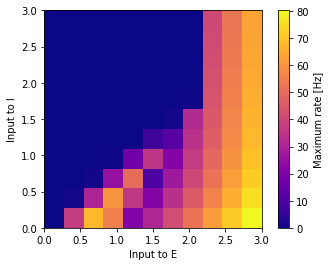

In [10]:
plt.imshow(search.dfResults.pivot_table(values='max_r', index = 'mui_ext_mean', columns='mue_ext_mean'), \
           extent = [min(search.dfResults.mue_ext_mean), max(search.dfResults.mue_ext_mean),
                     min(search.dfResults.mui_ext_mean), max(search.dfResults.mui_ext_mean)], origin='lower')
plt.colorbar(label='Maximum rate [Hz]')
plt.xlabel("Input to E")
plt.ylabel("Input to I")